# **Predicción de próxima palabra**

**Objetivo**

El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto utilizando la layer Embedding de Keras. Se utilizará esos embeddings junto con layers LSTM para predeccir la próxima posible palabra.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

import urllib
# Para leer y parsear el texto en HTML
import bs4 as bs
import nltk
nltk.download('punkt')

from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Datos**

Utilizo como dataset los discursos presidenciales del año 2022

In [ ]:
dis1 = "https://www.casarosada.gob.ar/informacion/discursos/48367-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-de-12-6-kilometros-de-la-autopista-ruta-nacional-8-en-san-antonio-de-areco-prov-de-buenos-aires"
dis2 = "https://www.casarosada.gob.ar/informacion/discursos/48374-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-presentacion-de-la-exposicion-del-ministro-de-economia-martin-guzman-sobre-las-negociaciones-con-el-fmi-ante-la-presencia-de-gobernadores-de-todo-el-pais-en-el-museo-del-bicentenario-de-la-casa-"
dis3 = "https://www.casarosada.gob.ar/informacion/discursos/48380-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-sesion-plenaria-de-la-xxii-reunion-de-cancilleres-de-la-celac"
dis4 = "https://www.casarosada.gob.ar/informacion/discursos/48386-palabras-del-presidente-de-la-nacion-alberto-fernandez-sobre-el-lanzamiento-del-mini-satelite-general-san-martin-en-estados-unidos-desde-el-museo-del-bicentenario-casa-rosada"
dis5 = "https://www.casarosada.gob.ar/informacion/discursos/48388-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-puesta-en-marcha-de-la-nueva-etapa-del-programa-precios-cuidados-desde-la-residencia-de-olivos"
dis6 = "https://www.casarosada.gob.ar/informacion/discursos/48392-palabras-del-presidente-de-la-nacion-alberto-fernandez-tras-entregar-distinciones-a-investigadores-del-sistema-cientifico-nacional-en-casa-rosada"
dis7 = "https://www.casarosada.gob.ar/informacion/discursos/48397-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-lanzamiento-de-cluster-renovable-nacional-en-el-centro-civico-de-la-ciudad-de-san-juan"
dis8 = "https://www.casarosada.gob.ar/informacion/discursos/48401-palabras-del-presidente-de-la-nacion-alberto-fernandez-por-el-lanzamiento-de-la-campana-nacional-de-vacunacion-para-la-presencialidad-en-las-escuelas-en-moron-provincia-de-buenos-aires"
dis9 = "https://www.casarosada.gob.ar/informacion/discursos/48408-palabras-del-presidente-de-la-nacion-alberto-fernandez-luego-de-la-presentacion-de-las-cartas-credenciales-de-las-nuevas-embajadoras-y-embajadores-ante-la-argentina-en-casa-rosada"
dis10 = "https://www.casarosada.gob.ar/informacion/discursos/48411-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-presentacion-del-programa-de-inclusion-digital-y-transformacion-educativa-santa-fe-conectada-casa-rosada"
dis11 = "https://www.casarosada.gob.ar/informacion/discursos/48414-palabras-del-presidente-de-la-nacion-alberto-fernandez-sobre-la-negociacion-de-deuda-con-el-fmi-desde-la-residencia-presidencial-de-olivos"
dis12 = "https://www.casarosada.gob.ar/informacion/discursos/48417-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-firma-de-dos-proyectos-para-salud-e-infraestructura-junto-a-autoridades-del-banco-europeo-de-inversiones"
dis13 = "https://www.casarosada.gob.ar/informacion/discursos/48420-palabras-del-presidente-de-la-nacion-alberto-fernandez-durante-su-visita-a-planta-grafica-argentina-donde-se-imprimen-libros-de-textos-del-programa-libros-para-aprender-en-loma-hermosa-buenos-aires"
dis14 = "https://www.casarosada.gob.ar/informacion/discursos/48439-palabras-del-presidente-de-la-nacion-alberto-fernandez-despues-de-recibir-la-distincion-de-profesor-honoris-causa-por-parte-de-la-universidad-de-tsinghua-en-china"
dis15 = "https://www.casarosada.gob.ar/informacion/discursos/48456-palabras-del-presidente-de-la-nacion-alberto-fernandez-tras-su-participacion-en-la-reunion-de-los-consejos-federales-de-salud-y-educacion-desde-el-museo-de-bicentenario-casa-rosada"
dis16 = "https://www.casarosada.gob.ar/informacion/discursos/48459-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-presentacion-de-la-segunda-etapa-del-programa-nac-de-infraestructura-universitaria-desde-el-museo-del-bicentenario"
dis17 = "https://www.casarosada.gob.ar/informacion/discursos/48463-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-en-el-cual-el-salon-de-los-cientificos-paso-a-llamarse-salon-de-la-ciencia-argentina"
dis18 = "https://www.casarosada.gob.ar/informacion/discursos/48464-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-entrega-de-reconocimientos-a-mujeres-por-su-labor-cientifica-sobre-covid-19-en-el-dia-internacional-de-la-mujer-y-la-nina-en-la-ciencia-polo-cientifico-tecnologico"
dis19 = "https://www.casarosada.gob.ar/informacion/discursos/48472-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-asuncion-de-remo-carlotto-como-secretario-ejecutivo-del-instituto-de-politicas-publicas-en-derechos-humanos-desde-la-ex-esma"
dis20 = "https://www.casarosada.gob.ar/informacion/discursos/48474-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-acto-de-anuncio-de-la-construccion-de-100-escuelas-tecnicas-de-educacion-profesional-secundaria-desde-tecnopolis"
dis21 = "https://www.casarosada.gob.ar/informacion/discursos/48479-palabras-del-presidente-de-la-nacion-alberto-fernandez-durante-su-reunion-con-empresarios-del-sector-turistico-e-intendentes-luego-del-recorrido-por-mar-de-ajo-partido-de-la-costa-prov-de-buenos-aires"
dis22 = "https://www.casarosada.gob.ar/informacion/discursos/48482-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-anuncio-del-plan-la-libertad-de-elegir-desde-el-museo-del-bicentenario-casa-rosada"
dis23 = "https://www.casarosada.gob.ar/informacion/discursos/48485-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-del-polideportivo-de-santa-clara-del-mar-desde-el-partido-bonaerense-de-mar-chiquita"
dis24 = "https://www.casarosada.gob.ar/informacion/discursos/48489-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-participacion-de-la-sesion-de-apertura-del-foro-mundial-para-una-recuperacion-centrada-en-las-personas-organizado-por-la-oti"
dis25 = "https://www.casarosada.gob.ar/informacion/discursos/48497-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-relanzamiento-de-la-juventud-universitaria-peronista-jup-desde-la-rectoria-de-la-universidad-nacional-de-la-plata"
dis26 = "https://www.casarosada.gob.ar/informacion/discursos/48493-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-anuncio-del-plan-de-apoyo-e-inversiones-en-ciencia-por-mas-de-15-mil-millones-desde-el-edificio-cero-infinito-de-la-uba-en-la-ciudad-universitaria"
dis27 = "https://www.casarosada.gob.ar/informacion/discursos/48500-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-por-el-76-aniversario-del-primer-triunfo-electoral-del-peronismo-avenida-gueemes-provincia-de-catamarca"
dis28 = "https://www.casarosada.gob.ar/informacion/discursos/48504-palabras-del-presidente-de-la-nacion-alberto-fernandez-luego-de-sobrevolar-las-zonas-afectadas-por-los-incendios-forestales-desde-el-departamento-de-san-miguel-prov-corrientes"
dis29 = "https://www.casarosada.gob.ar/informacion/discursos/48502-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-su-recorrida-por-la-fabrica-novatech-una-empresa-dedicada-a-producir-insumos-tecnologicos-en-la-provincia-de-catamarca"
dis30 = "https://www.casarosada.gob.ar/informacion/discursos/48505-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-apertura-del-140-periodo-de-sesiones-ordinarias-en-el-congreso-de-la-nacion-argentina"
dis31 = "https://www.casarosada.gob.ar/informacion/discursos/48509-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-del-ciclo-lectivo-2022-desde-la-escuela-normal-primaria-doctor-pedro-ignacio-de-castro-barros-de-la-provincia-de-la-rioja"
dis32 = "https://www.casarosada.gob.ar/informacion/discursos/48524-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-apertura-de-la-tercera-edicion-de-nosotras-movemos-el-mundo-dentro-de-las-actividadess-para-conmemorar-el-dia-internacional-de-las-mujeres-trabajadoras-desde-el-centro-cultural-kirchner"
dis33 = "https://www.casarosada.gob.ar/informacion/discursos/48528-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-cierre-del-encuentro-federal-de-concejalas-e-intendentas-de-la-federacion-argentina-de-municipios-desde-el-centro-cultural-kirchner"
dis34 = "https://www.casarosada.gob.ar/informacion/discursos/48535-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-por-el-dia-internacional-de-las-mujeres-trabajadoras-desde-el-municipio-jose-c-paz-provincia-de-buenos-aires"
dis35 = "https://www.casarosada.gob.ar/informacion/discursos/48542-palabras-del-presidente-de-la-nacion-alberto-fernandez-luego-de-recibir-a-su-par-de-republica-dominicana-luis-abinader-corona-y-firmar-una-declaracion-conjunta-para-promover-el-desarrollo-hidrocarburifero-entre-ambos-paises-desde-casa-rosada"
dis36 = "https://www.casarosada.gob.ar/informacion/discursos/48560-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-de-la-renovada-estacion-tortuguitas-de-la-linea-del-ferrocarril-belgrano-norte-en-el-partido-bonarense-de-malvinas-argentinas"
dis37 = "https://www.casarosada.gob.ar/informacion/discursos/48564-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-presentacion-del-programa-volve-a-estudiar-para-titulares-del-plan-potenciar-trabajo-tecnopolis"
dis38 = "https://www.casarosada.gob.ar/informacion/discursos/48577-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-entrega-de-la-vivienda-y-el-credito-40-mil-de-la-gestion-desde-la-provincia-de-salta"
dis39 = "https://www.casarosada.gob.ar/informacion/discursos/48580-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-firma-de-una-serie-de-convenios-para-la-construccion-de-dos-alcaldias-y-se-entregaran-100-patrulleros-desde-la-casa-de-gobierno-de-tucuman"
dis40 = "https://www.casarosada.gob.ar/informacion/discursos/48589-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-reunion-del-gabinete-nacional-del-cambio-climatico-museo-del-bicentenario-casa-rosada"
dis41 = "https://www.casarosada.gob.ar/informacion/discursos/48594-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-del-edificio-de-la-escuela-de-educacion-tecnica-n-100-desde-parana"
dis42 = "https://www.casarosada.gob.ar/informacion/discursos/48597-palabras-del-presidente-de-la-nacion-alberto-fernandez-durante-un-dialogo-con-mas-de-500-jovenes-de-centros-de-estudiantes-de-escuelas-secundarias-y-superiores-que-forman-parte-del-plan-creando-territorio-en-el-centro-provincial-de-convenciones-prov-de-en"
dis43 = "https://www.casarosada.gob.ar/informacion/discursos/48599-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-por-el-dia-nacional-de-la-memoria-por-la-verdad-y-la-justicia-en-el-auditorio-del-centro-cultural-de-la-ciencia-en-el-barrio-porteno-de-palermo"


In [ ]:
discursos = [dis1,dis2,dis3,dis4,dis5,dis6,dis7,dis8,dis9,dis10,dis11,dis12,dis13,dis14,dis15,dis16,dis17,dis18,dis19,dis20,dis21,dis22,dis23,dis24,dis25,dis26,dis27,dis28,dis29,dis30,dis31,dis32,dis33,dis34,dis35,dis36,dis37,dis38,dis39,dis40,dis41,dis42,dis43]

In [ ]:
completo = ''
for dis in discursos:
    raw_html = urllib.request.urlopen(dis)
    raw_html = raw_html.read()
    article_html = bs.BeautifulSoup(raw_html, 'lxml')
    article_paragraphs = article_html.find_all('p')
    article_text = ''
    for para in article_paragraphs:
        article_text += para.text
    article_text = article_text.lower()
    completo = completo + article_text
    

In [ ]:
print("Cantidad de caracteres del discurso:", len(completo))

Cantidad de caracteres del discurso: 368466


In [ ]:
# Separo las oraciones utilizando salto de línea con nltk
oraciones = nltk.sent_tokenize(completo)
oraciones

['palabras del presidente de la nación, alberto fernández, en la inauguración de 12,6 kilómetros de la autopista ruta nacional 8, en san antonio de areco, prov.',
 'de buenos airesbuenas tardes a todos y a todas; muchas gracias a todos y todas, gracias por estar acá, gracias por esperarme con este calor tremendo y estar en la ruta; la verdad mi gratitud eterna por estar acá.',
 'gracias querido intendente interino por recibirnos en su querido, en nuestro querido san antonio de areco, gracias gustavo, gracias a los queridos compañeros de la uocra por el esfuerzo que hacen y por estar aquí, también presente en este día.en realidad “kato” me venía explicando lo trascendente de esta obra, esta obra es producto de que san antonio de areco creció mucho y la ruta – de repente – se convirtió en una avenida y empezó a pasar por el centro de la ciudad y eso era un peligro; el peligro del que hablaba edith, inclusive.',
 'y también era necesario porque cuando nosotros decimos que hay que cuidar l

In [ ]:
# Se crea un dataframe utilizando el corpus
df = pd.DataFrame(oraciones)
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 1640


# **1 - Ejemplo de Preprocesamiento**



*   Hay que transformar las oraciones en tokens.
*   Dichas oraciones hay que ajustarlas al tamaño fijo de nuestra sentencia de entrada al modelo.
*   Hay que separar las palabras objetivos (target) que el modelo debe predecir en cada sentencia armada.












In [ ]:
from keras.preprocessing.text import Tokenizer # equivalente a ltokenizer de nltk
from keras.preprocessing.text import text_to_word_sequence # equivalente a word_teokenize de nltk
from keras.preprocessing.sequence import pad_sequences # se utilizará para padding

# largo de la secuencia, incluye seq input + word output
train_len = 4

In [ ]:
# Ejemplo de como transformar una oración a tokens usando keras
text = df.loc[10,0]
text

'históricamente la obra pública ocupaba un tercio de esas personas; hoy estamos ocupando la mitad de esas personas.esto quiere decir que la obra pública ha tenido una velocidad tan enorme que hoy demandamos tanto de la obra pública, como demanda el sector privado a los que trabajan en la construcción y tenemos ya 380 mil personas, cuando la construcción ha llegado a superar un poco más de 400 mil en su mejor momento en el número de trabajadores, por lo cual aspiramos a que muchos más trabajadores y muchas más trabajadoras, porque ahora existen las albañilas, que trabajan mucho en la construcción de viviendas.ojalá que ese empleo siga creciendo y que todo este esfuerzo que hace el estado por mejorar la infraestructura del país, sirva para que también el trabajo se multiplique.'

In [ ]:
tokens = text_to_word_sequence(text) # entran oraciones -> salen vectores de N posiciones (tokens)
tokens

['históricamente',
 'la',
 'obra',
 'pública',
 'ocupaba',
 'un',
 'tercio',
 'de',
 'esas',
 'personas',
 'hoy',
 'estamos',
 'ocupando',
 'la',
 'mitad',
 'de',
 'esas',
 'personas',
 'esto',
 'quiere',
 'decir',
 'que',
 'la',
 'obra',
 'pública',
 'ha',
 'tenido',
 'una',
 'velocidad',
 'tan',
 'enorme',
 'que',
 'hoy',
 'demandamos',
 'tanto',
 'de',
 'la',
 'obra',
 'pública',
 'como',
 'demanda',
 'el',
 'sector',
 'privado',
 'a',
 'los',
 'que',
 'trabajan',
 'en',
 'la',
 'construcción',
 'y',
 'tenemos',
 'ya',
 '380',
 'mil',
 'personas',
 'cuando',
 'la',
 'construcción',
 'ha',
 'llegado',
 'a',
 'superar',
 'un',
 'poco',
 'más',
 'de',
 '400',
 'mil',
 'en',
 'su',
 'mejor',
 'momento',
 'en',
 'el',
 'número',
 'de',
 'trabajadores',
 'por',
 'lo',
 'cual',
 'aspiramos',
 'a',
 'que',
 'muchos',
 'más',
 'trabajadores',
 'y',
 'muchas',
 'más',
 'trabajadoras',
 'porque',
 'ahora',
 'existen',
 'las',
 'albañilas',
 'que',
 'trabajan',
 'mucho',
 'en',
 'la',
 'constru

1.1 - Transformar las oraciones en secuencias (tokens) de palabras

In [ ]:
# Recorrer todas las filas y transformar las oraciones
# en secuencias de palabras
sentence_tokens = []
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [ ]:
# Demos un vistazo
sentence_tokens[:2]

[['palabras',
  'del',
  'presidente',
  'de',
  'la',
  'nación',
  'alberto',
  'fernández',
  'en',
  'la',
  'inauguración',
  'de',
  '12',
  '6',
  'kilómetros',
  'de',
  'la',
  'autopista',
  'ruta',
  'nacional',
  '8',
  'en',
  'san',
  'antonio',
  'de',
  'areco',
  'prov'],
 ['de',
  'buenos',
  'airesbuenas',
  'tardes',
  'a',
  'todos',
  'y',
  'a',
  'todas',
  'muchas',
  'gracias',
  'a',
  'todos',
  'y',
  'todas',
  'gracias',
  'por',
  'estar',
  'acá',
  'gracias',
  'por',
  'esperarme',
  'con',
  'este',
  'calor',
  'tremendo',
  'y',
  'estar',
  'en',
  'la',
  'ruta',
  'la',
  'verdad',
  'mi',
  'gratitud',
  'eterna',
  'por',
  'estar',
  'acá']]

In [ ]:
# Código para hacer el desfazaje de las palabras
# según el train_len
text_sequences = []

for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
# Demos un vistazo a nuestros vectores para entrenar el modelo
text_sequences

[['históricamente', 'la', 'obra', 'pública'],
 ['la', 'obra', 'pública', 'ocupaba'],
 ['obra', 'pública', 'ocupaba', 'un'],
 ['pública', 'ocupaba', 'un', 'tercio'],
 ['ocupaba', 'un', 'tercio', 'de'],
 ['un', 'tercio', 'de', 'esas'],
 ['tercio', 'de', 'esas', 'personas'],
 ['de', 'esas', 'personas', 'hoy'],
 ['esas', 'personas', 'hoy', 'estamos'],
 ['personas', 'hoy', 'estamos', 'ocupando'],
 ['hoy', 'estamos', 'ocupando', 'la'],
 ['estamos', 'ocupando', 'la', 'mitad'],
 ['ocupando', 'la', 'mitad', 'de'],
 ['la', 'mitad', 'de', 'esas'],
 ['mitad', 'de', 'esas', 'personas'],
 ['de', 'esas', 'personas', 'esto'],
 ['esas', 'personas', 'esto', 'quiere'],
 ['personas', 'esto', 'quiere', 'decir'],
 ['esto', 'quiere', 'decir', 'que'],
 ['quiere', 'decir', 'que', 'la'],
 ['decir', 'que', 'la', 'obra'],
 ['que', 'la', 'obra', 'pública'],
 ['la', 'obra', 'pública', 'ha'],
 ['obra', 'pública', 'ha', 'tenido'],
 ['pública', 'ha', 'tenido', 'una'],
 ['ha', 'tenido', 'una', 'velocidad'],
 ['tenido',

1.2 - Crear los vectores de palabras (word2vec)

Ahora necesitamos pasarlos a números para que lo entienda la red y separar input de output.


*   El Input seran integers (word2vec)
*   Mientras que el output será one hot encodeado (labels) del tamaño del vocabulario

In [ ]:
tok = Tokenizer() 

# El tokeinzer "aprende" las palabras que se usaran
# Se construye (fit) una vez por proyecto, se aplica N veces (tal cual un encoder)
tok.fit_on_texts(text_sequences) 

# Convertimos las palabras a números
# entran palabras -> salen números
sequences = tok.texts_to_sequences(text_sequences)

In [ ]:
# Ahora sequences tiene los números "ID", largo 4
sequences

[[84, 2, 12, 6],
 [2, 12, 6, 21],
 [12, 6, 21, 13],
 [6, 21, 13, 22],
 [21, 13, 22, 3],
 [13, 22, 3, 14],
 [22, 3, 14, 7],
 [3, 14, 7, 15],
 [14, 7, 15, 23],
 [7, 15, 23, 24],
 [15, 23, 24, 2],
 [23, 24, 2, 25],
 [24, 2, 25, 3],
 [2, 25, 3, 14],
 [25, 3, 14, 7],
 [3, 14, 7, 26],
 [14, 7, 26, 27],
 [7, 26, 27, 28],
 [26, 27, 28, 1],
 [27, 28, 1, 2],
 [28, 1, 2, 12],
 [1, 2, 12, 6],
 [2, 12, 6, 16],
 [12, 6, 16, 29],
 [6, 16, 29, 30],
 [16, 29, 30, 31],
 [29, 30, 31, 32],
 [30, 31, 32, 33],
 [31, 32, 33, 1],
 [32, 33, 1, 15],
 [33, 1, 15, 34],
 [1, 15, 34, 35],
 [15, 34, 35, 3],
 [34, 35, 3, 2],
 [35, 3, 2, 12],
 [3, 2, 12, 6],
 [2, 12, 6, 36],
 [12, 6, 36, 37],
 [6, 36, 37, 5],
 [36, 37, 5, 38],
 [37, 5, 38, 39],
 [5, 38, 39, 8],
 [38, 39, 8, 40],
 [39, 8, 40, 1],
 [8, 40, 1, 17],
 [40, 1, 17, 4],
 [1, 17, 4, 2],
 [17, 4, 2, 9],
 [4, 2, 9, 10],
 [2, 9, 10, 41],
 [9, 10, 41, 42],
 [10, 41, 42, 43],
 [41, 42, 43, 18],
 [42, 43, 18, 7],
 [43, 18, 7, 44],
 [18, 7, 44, 2],
 [7, 44, 2, 9],
 [

In [ ]:
# Cantidad de casos (doc) de entrada
print(tok.document_count)

130


In [ ]:
# Cantidad de veces que aparece cada palabra
print(len(tok.word_counts))

85


In [ ]:
# El índice para cada palabra
# El sistema las ordena de las más populares a las menos populares
print(tok.word_index)

{'que': 1, 'la': 2, 'de': 3, 'en': 4, 'el': 5, 'pública': 6, 'personas': 7, 'a': 8, 'construcción': 9, 'y': 10, 'más': 11, 'obra': 12, 'un': 13, 'esas': 14, 'hoy': 15, 'ha': 16, 'trabajan': 17, 'mil': 18, 'trabajadores': 19, 'por': 20, 'ocupaba': 21, 'tercio': 22, 'estamos': 23, 'ocupando': 24, 'mitad': 25, 'esto': 26, 'quiere': 27, 'decir': 28, 'tenido': 29, 'una': 30, 'velocidad': 31, 'tan': 32, 'enorme': 33, 'demandamos': 34, 'tanto': 35, 'como': 36, 'demanda': 37, 'sector': 38, 'privado': 39, 'los': 40, 'tenemos': 41, 'ya': 42, '380': 43, 'cuando': 44, 'llegado': 45, 'superar': 46, 'poco': 47, '400': 48, 'su': 49, 'mejor': 50, 'momento': 51, 'número': 52, 'lo': 53, 'cual': 54, 'aspiramos': 55, 'muchos': 56, 'muchas': 57, 'trabajadoras': 58, 'porque': 59, 'ahora': 60, 'existen': 61, 'las': 62, 'albañilas': 63, 'mucho': 64, 'viviendas': 65, 'ojalá': 66, 'ese': 67, 'empleo': 68, 'siga': 69, 'creciendo': 70, 'todo': 71, 'este': 72, 'esfuerzo': 73, 'hace': 74, 'estado': 75, 'mejorar': 7

In [ ]:
# Cantidad de veces quea aparece cada palabra en cada "documento"
# (1 documento = 1 caso de entrada)
print(tok.word_docs)

defaultdict(<class 'int'>, {'históricamente': 1, 'la': 30, 'pública': 12, 'obra': 11, 'ocupaba': 4, 'un': 8, 'tercio': 4, 'de': 24, 'esas': 8, 'personas': 12, 'hoy': 8, 'estamos': 4, 'ocupando': 4, 'mitad': 4, 'esto': 4, 'quiere': 4, 'decir': 4, 'que': 36, 'ha': 8, 'tenido': 4, 'una': 4, 'velocidad': 4, 'tan': 4, 'enorme': 4, 'demandamos': 4, 'tanto': 4, 'como': 4, 'demanda': 4, 'el': 15, 'sector': 4, 'privado': 4, 'a': 12, 'los': 4, 'trabajan': 8, 'en': 16, 'construcción': 12, 'y': 12, 'tenemos': 4, 'ya': 4, '380': 4, 'mil': 8, 'cuando': 4, 'llegado': 4, 'superar': 4, 'poco': 4, 'más': 12, '400': 4, 'su': 4, 'mejor': 4, 'momento': 4, 'número': 4, 'trabajadores': 8, 'por': 8, 'lo': 4, 'cual': 4, 'aspiramos': 4, 'muchos': 4, 'muchas': 4, 'trabajadoras': 4, 'porque': 4, 'ahora': 4, 'existen': 4, 'las': 4, 'albañilas': 4, 'mucho': 4, 'viviendas': 4, 'ojalá': 4, 'ese': 4, 'empleo': 4, 'siga': 4, 'creciendo': 4, 'todo': 4, 'este': 4, 'esfuerzo': 4, 'hace': 4, 'estado': 4, 'mejorar': 4, 'inf

# **2 - Preprocesamiento completo**
Debemos realizar los mismos pasos que en el ejemplo anterior, pero antes de eso debemos transformar ese dataset de filas de oraciones en un texto completo continuo para poder extraer el vocabulario.

In [ ]:
# Vistazo a las primeras filas
df.loc[:15,0]

0     palabras del presidente de la nación, alberto ...
1     de buenos airesbuenas tardes a todos y a todas...
2     gracias querido intendente interino por recibi...
3     y también era necesario porque cuando nosotros...
4     hay que cuidarla cuando viene una pandemia y h...
5     hay que hacer rutas seguras, lugares donde los...
6     y en verdad este era un caso, una ruta muy tra...
7                              no importa cómo piensen.
8     la magnitud de la obra pública, que hoy tenemo...
9     hoy en día tenemos 380.000 personas trabajando...
10    históricamente la obra pública ocupaba un terc...
11    silvina lo decía recién, acá nosotros vemos do...
12    por eso yo siempre digo, cuando decimos que qu...
13    así que disfrutémoslo, una vez más les doy las...
14    pero recién la escuchaba contar una historia d...
15    les agradezco a todos y a todas, que tengan un...
Name: 0, dtype: object

In [ ]:
# Concatenamos todos los rows en un solo valor
corpus = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=0)[0]
corpus

'palabras del presidente de la nación, alberto fernández, en la inauguración de 12,6 kilómetros de la autopista ruta nacional 8, en san antonio de areco, prov. de buenos airesbuenas tardes a todos y a todas; muchas gracias a todos y todas, gracias por estar acá, gracias por esperarme con este calor tremendo y estar en la ruta; la verdad mi gratitud eterna por estar acá. gracias querido intendente interino por recibirnos en su querido, en nuestro querido san antonio de areco, gracias gustavo, gracias a los queridos compañeros de la uocra por el esfuerzo que hacen y por estar aquí, también presente en este día.en realidad “kato” me venía explicando lo trascendente de esta obra, esta obra es producto de que san antonio de areco creció mucho y la ruta – de repente – se convirtió en una avenida y empezó a pasar por el centro de la ciudad y eso era un peligro; el peligro del que hablaba edith, inclusive. y también era necesario porque cuando nosotros decimos que hay que cuidar la vida porque

In [ ]:
# Transformar el corpus a tokens
tokens=text_to_word_sequence(corpus)
# Vistazo general de los primeros tokens
tokens[:20]

['palabras',
 'del',
 'presidente',
 'de',
 'la',
 'nación',
 'alberto',
 'fernández',
 'en',
 'la',
 'inauguración',
 'de',
 '12',
 '6',
 'kilómetros',
 'de',
 'la',
 'autopista',
 'ruta',
 'nacional']

In [ ]:
print("Cantidad de tokens en el corpus:", len(tokens))

Cantidad de tokens en el corpus: 62200


In [ ]:
# Código para hacer el desfazaje de las palabras
# según el train_len
text_sequences = []
for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
# Demos un vistazo a nuestros vectores para entrenar el modelo
text_sequences[:20]

[['palabras', 'del', 'presidente', 'de'],
 ['del', 'presidente', 'de', 'la'],
 ['presidente', 'de', 'la', 'nación'],
 ['de', 'la', 'nación', 'alberto'],
 ['la', 'nación', 'alberto', 'fernández'],
 ['nación', 'alberto', 'fernández', 'en'],
 ['alberto', 'fernández', 'en', 'la'],
 ['fernández', 'en', 'la', 'inauguración'],
 ['en', 'la', 'inauguración', 'de'],
 ['la', 'inauguración', 'de', '12'],
 ['inauguración', 'de', '12', '6'],
 ['de', '12', '6', 'kilómetros'],
 ['12', '6', 'kilómetros', 'de'],
 ['6', 'kilómetros', 'de', 'la'],
 ['kilómetros', 'de', 'la', 'autopista'],
 ['de', 'la', 'autopista', 'ruta'],
 ['la', 'autopista', 'ruta', 'nacional'],
 ['autopista', 'ruta', 'nacional', '8'],
 ['ruta', 'nacional', '8', 'en'],
 ['nacional', '8', 'en', 'san']]

In [ ]:
# Proceso de tokenizacion
tok = Tokenizer() 
tok.fit_on_texts(text_sequences) 

# Convertimos las palabras a números
# entran palabras -> salen números
sequences = tok.texts_to_sequences(text_sequences)

# Damos un vistazo
sequences[:20]

[[1039, 19, 102, 2],
 [19, 102, 2, 3],
 [102, 2, 3, 125],
 [2, 3, 125, 142],
 [3, 125, 142, 166],
 [125, 142, 166, 6],
 [142, 166, 6, 3],
 [166, 6, 3, 1040],
 [6, 3, 1040, 2],
 [3, 1040, 2, 1747],
 [1040, 2, 1747, 2317],
 [2, 1747, 2317, 522],
 [1747, 2317, 522, 2],
 [2317, 522, 2, 3],
 [522, 2, 3, 2318],
 [2, 3, 2318, 247],
 [3, 2318, 247, 141],
 [2318, 247, 141, 617],
 [247, 141, 617, 6],
 [141, 617, 6, 361]]

In [ ]:
print("Cantidad de rows del dataset:", len(sequences))

Cantidad de rows del dataset: 62196


# **3 - Input y target**

In [ ]:
# Con numpy es muy fácil realizar el slicing de vectores
ex = np.array([[1,2,3,4],[5,6,7,8]])
ex

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# Con numpy es muy fácil realizar el slicing de vectores
print("Dimension:", ex.shape)
print("Todos los elementos:", ex)
print("Todos los elementos menos el último:", ex[:, :-1])

Dimension: (2, 4)
Todos los elementos: [[1 2 3 4]
 [5 6 7 8]]
Todos los elementos menos el último: [[1 2 3]
 [5 6 7]]


In [ ]:
input = ex[:,:-1] # todos los rows, menos la ultima col
target = ex[:, -1] # última col de cada row

print("Input:", input)
print("Target:", target)

Input: [[1 2 3]
 [5 6 7]]
Target: [4 8]


In [ ]:
arr_sequences = np.array(sequences)
x_data = arr_sequences[:,:-1]
y_data_int = arr_sequences[:,-1] # aún falta el oneHotEncoder

print(x_data.shape)
print(y_data_int.shape)

(62196, 3)
(62196,)


In [ ]:
# Palabras del vocabulario
tok.index_word

{1: 'que',
 2: 'de',
 3: 'la',
 4: 'y',
 5: 'a',
 6: 'en',
 7: 'el',
 8: 'los',
 9: 'un',
 10: 'es',
 11: 'lo',
 12: 'no',
 13: 'para',
 14: 'una',
 15: 'con',
 16: 'por',
 17: 'las',
 18: 'se',
 19: 'del',
 20: 'argentina',
 21: 'porque',
 22: 'más',
 23: 'todos',
 24: 'nos',
 25: 'al',
 26: 'eso',
 27: 'como',
 28: 'me',
 29: 'aplausos',
 30: 'pero',
 31: 'yo',
 32: 'este',
 33: 'nosotros',
 34: 'muy',
 35: 'su',
 36: 'tenemos',
 37: 'también',
 38: 'cuando',
 39: 'todo',
 40: 'gracias',
 41: 'hoy',
 42: '–',
 43: 'hay',
 44: 'todas',
 45: 'le',
 46: 'hacer',
 47: 'tiene',
 48: 'mundo',
 49: 'ese',
 50: 'fue',
 51: 'vamos',
 52: 'son',
 53: 'estamos',
 54: 'años',
 55: 'día',
 56: 'esa',
 57: 'verdad',
 58: 'país',
 59: 'les',
 60: 'trabajo',
 61: 'donde',
 62: 'si',
 63: 'pandemia',
 64: 'sociedad',
 65: 'mucho',
 66: 'era',
 67: 'tiempo',
 68: 'educación',
 69: 'tienen',
 70: 'argentinos',
 71: 'están',
 72: 'ser',
 73: 'esta',
 74: 'sus',
 75: 'esto',
 76: 'año',
 77: 'universidad

In [ ]:
# Cantidad de palabras en el vocabulario
vocab_size = len(tok.word_counts)
vocab_size

7196

In [ ]:
# Transformar los datos a oneHotEncoding
y_data = to_categorical(y_data_int, num_classes=vocab_size)

IndexError: ignored

In [ ]:
# En el caso anterior explota porque y_data_int comienza en "1" en vez de "0"
# valor minimo:
min(y_data_int)

1

In [ ]:
y_data_int_offset = y_data_int - 1
y_data = to_categorical(y_data_int_offset, num_classes=vocab_size) 
y_data.shape

(62196, 7196)

# **4 - Entrenar el modelo**

In [ ]:
# largo de la secuencia de entrada
input_seq_len = x_data.shape[1] 
input_seq_len

3

In [ ]:
# Largo del vector de salida --> vocab_size
output_size = vocab_size
output_size

7196

In [ ]:
model = Sequential()

# Embedding:
# input_seq_len = 3 --> ingreso 3 palabras
# input_dim = vocab_size --> 1628 palabras distintas
# output_dim = 5 --> crear embeddings de tamaño 3 (tamaño variable y ajustable)
model.add(Embedding(input_dim=vocab_size+1, output_dim=5, input_length=input_seq_len))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64)) # La última capa LSTM no lleva return_sequences
model.add(Dense(32, activation='relu'))

# Predicción de clasificación con softmax
# La salida vuelve al espacio de 1628 palabras posibles
model.add(Dense(vocab_size, activation='softmax'))

# Clasificación multiple categórica --> loss = categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              35985     
                                                                 
 lstm (LSTM)                 (None, 3, 64)             17920     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 7196)              237468    
                                                                 
Total params: 326,477
Trainable params: 326,477
Non-trai

In [ ]:
hist = model.fit(x_data, y_data, epochs=50, validation_split=0.2)

Epoch 1/50
1555/1555 [==============================] - 32s 18ms/step - loss: 6.7970 - accuracy: 0.0489 - val_loss: 6.6644 - val_accuracy: 0.0417
Epoch 2/50
1555/1555 [==============================] - 22s 14ms/step - loss: 6.4207 - accuracy: 0.0510 - val_loss: 6.6014 - val_accuracy: 0.0473
Epoch 3/50
1555/1555 [==============================] - 22s 14ms/step - loss: 6.2119 - accuracy: 0.0715 - val_loss: 6.5906 - val_accuracy: 0.0690
Epoch 4/50
1555/1555 [==============================] - 22s 14ms/step - loss: 6.0249 - accuracy: 0.0807 - val_loss: 6.5537 - val_accuracy: 0.0794
Epoch 5/50
1555/1555 [==============================] - 22s 14ms/step - loss: 5.8399 - accuracy: 0.0882 - val_loss: 6.6241 - val_accuracy: 0.0868
Epoch 6/50
1555/1555 [==============================] - 23s 14ms/step - loss: 5.6898 - accuracy: 0.0965 - val_loss: 6.6124 - val_accuracy: 0.0939
Epoch 7/50
1555/1555 [==============================] - 23s 15ms/step - loss: 5.5533 - accuracy: 0.1052 - val_loss: 6.6683 -

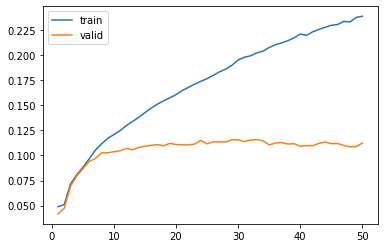

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

# **5 - Predicción de próxima palabra**

In [ ]:
# Keras pad_sequences
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Si la secuencia de entrada supera al input_seq_len (3) se trunca
# Si la secuencia es más corta se agregna ceros al comienzo

In [ ]:
# Se utilizará gradio para ensayar el modelo
# Herramienta poderosa para crear interfaces rápidas para ensayar modelos
# https://gradio.app/
import sys
!{sys.executable} -m pip install gradio --quiet

     |████████████████████████████████| 668 kB 27.5 MB/s 
     |████████████████████████████████| 211 kB 55.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.0 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 2.0 MB 54.9 MB/s 
     |████████████████████████████████| 255 kB 67.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 75.9 MB/s 
     |████████████████████████████████| 271 kB 64.8 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 10.9 MB 52.9 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 61 kB 462 kB/s 
     |████████████████████████████████| 3.6 MB 64.4 MB/s 
     |███████████████████████

In [ ]:
import gradio as gr

def model_response(human_text):

    # Encodeamos
    encoded = tok.texts_to_sequences([human_text])[0]
    # Si tienen distinto largo
    encoded = pad_sequences([encoded], maxlen=3, padding='pre')
    
    # Predicción softmax
    y_hat = model.predict(encoded).argmax(axis=-1)

    # Debemos buscar en el vocabulario la palabra
    # que corresopnde al indice (y_hat) predicho por le modelo
    out_word = ''
    for word, index in tok.word_index.items():
        if index == y_hat:
            out_word = word
            break

    # Agrego la palabra a la frase predicha
    return human_text + ' ' + out_word
examples = [["la pobreza esta"],["hay que mirar"], ["seguridad y economía"]]
iface = gr.Interface(
    fn=model_response,
    inputs=["textbox"],
    outputs="text",
    layout="vertical",
    examples=examples)

iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://10596.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f846ae9d850>,
 'http://127.0.0.1:7860/',
 'https://10596.gradio.app')

# **6 - Generación de secuencias nuevas**

In [ ]:
def generate_seq(model, tokenizer, seed_text, max_length, n_words):
    """
        Exec model sequence prediction

        Args:
            model (keras): modelo entrenado
            tokenizer (keras tokenizer): tonenizer utilizado en el preprocesamiento
            seed_text (string): texto de entrada (input_seq)
            max_length (int): máxima longitud de la sequencia de entrada
            n_words (int): números de palabras a agregar a la sequencia de entrada
        returns:
            output_text (string): sentencia con las "n_words" agregadas
    """
    output_text = seed_text
	# generate a fixed number of words
    for _ in range(n_words):
		# Encodeamos
        encoded = tokenizer.texts_to_sequences([output_text])[0]
		# Si tienen distinto largo
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		
		# Predicción softmax
        y_hat = model.predict(encoded).argmax(axis=-1)
		# Vamos concatenando las predicciones
        out_word = ''

        # Debemos buscar en el vocabulario la palabra
        # que corresopnde al indice (y_hat) predicho por le modelo
        for word, index in tokenizer.word_index.items():
            if index == y_hat:
                out_word = word
                break

		# Agrego las palabras a la frase predicha
        output_text += ' ' + out_word
    return output_text

In [ ]:
input_text='seguridad, economía'

generate_seq(model, tok, input_text, max_length=3, n_words=2)

'seguridad, economía expresado a'

# **Conclusiones**

Luego de hacer varias pruebas sobre el modelo se verifica lo que se había visto en el gráfico que compara los resultados de entrenamiento y validación. El modelo hace mucho overfitting y no generaliza por lo tanto su desempeño es muy pobre. 
Para mejorar estos resultados se podrían plantear varias acciones como po ej. mejorar el preprocesamiento del corpues, aumentar el número de épocas, modificar la estructura de la red o aumentar el tamñano del corpus.

Creo que de todas las opciones la que puede mejor el desempeño es aumentar el tamaña del corpus por lo tanto voy a ampliar el corpus a casi el doble del dataset con discursos del año 2021.

In [ ]:
dis44 = "https://www.casarosada.gob.ar/informacion/discursos/48365-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-entrega-de-viviendas-mas-importante-de-la-historia-del-procrear-en-el-barrio-porteno-de-parque-patricios"
dis45 = "https://www.casarosada.gob.ar/informacion/discursos/48356-palabras-del-presidente-de-la-nacion-alberto-fernandez-tras-la-entrega-de-despachos-y-sables-a-altos-mandos-militares-en-el-museo-del-bicentenario-de-casa-rosada"
dis46 = "https://www.casarosada.gob.ar/informacion/discursos/48355-mensaje-del-presidente-alberto-fernandez-con-motivo-de-las-fiestas-de-fin-de-ano"
dis47 = "https://www.casarosada.gob.ar/informacion/discursos/48346-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-de-una-unidad-productiva-de-ultima-generacion-de-los-laboratorios-richmond"
dis48 = "https://www.casarosada.gob.ar/informacion/discursos/48344-palabras-del-presidente-de-la-nacion-alberto-fernandez-por-la-ceremonia-de-egreso-de-subtenientes-y-guardiamarinas-de-la-ffaa-en-el-palomar-provincia-de-buenos-aires"
dis49 = "https://www.casarosada.gob.ar/informacion/discursos/48339-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-homenaje-a-las-victimas-de-la-represion-de-diciembre-del-2021"
dis50 = "https://www.casarosada.gob.ar/informacion/discursos/48330-palabras-del-presidente-de-la-nacion-en-la-lix-cumbre-de-jefes-de-estado-del-mercosur-y-asociados-por-video-conferencia"
dis51 = "https://www.casarosada.gob.ar/informacion/discursos/48327-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-entrega-de-la-jubilacion-50-mil-por-tareas-de-cuidados-y-la-anticipada-n-2-mil-en-el-museo-del-bicentenario-de-casa-rosada"
dis52 = "https://www.casarosada.gob.ar/informacion/discursos/48323-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-encuentro-de-cierre-de-ano-del-consejo-economico-y-social-desde-el-teatro-nacional-cervantes"
dis53 = "https://www.casarosada.gob.ar/informacion/discursos/48316-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-cierre-del-primer-encuentro-federal-del-plan-de-los-1000-dias-desde-tecnopolis"
dis54 = "https://www.casarosada.gob.ar/informacion/discursos/48314-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-reunion-de-gabinete-federal-y-firma-de-convenios-para-financiamiento-y-anuncios-de-obras-e-inversiones-desde-el-gimnasio-municipal-de-montero-prov-de-tucuman"
dis55 = "https://www.casarosada.gob.ar/informacion/discursos/48309-palabras-del-presidente-de-la-nacion-alberto-fernandez-sobre-la-ampliacion-de-las-becas-progresar-para-adolescentes-de-16-y-17-anos"
dis56 = "https://www.casarosada.gob.ar/informacion/discursos/48299-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-acto-de-entrega-de-los-premios-azucena-villaflor-2021-desde-el-museo-del-bicentenario-casa-rosada"
dis57 = "https://www.casarosada.gob.ar/informacion/discursos/48298-palabras-del-presidente-de-la-nacion-alberto-fernandez-ante-la-cumbre-por-la-democracia-realizada-en-washington-estados-unidos-por-videoconferencia"
dis58 = "https://www.casarosada.gob.ar/informacion/discursos/48293-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-acto-de-entrega-de-la-vivienda-numero-30-mil-y-el-credito-para-la-construccion-de-viviendas-numero-30-mil-de-su-gestion-en-ezeiza"
dis59 = "https://www.casarosada.gob.ar/informacion/discursos/48290-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-homenaje-a-los-12-de-la-iglesia-de-la-santa-cruz-caba"
dis60 = "https://www.casarosada.gob.ar/informacion/discursos/48283-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-relanzamiento-del-programa-mas-cultura-desde-tecnopolis"
dis61 = "https://www.casarosada.gob.ar/informacion/discursos/48275-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-inauguracion-de-la-segunda-linea-de-produccion-de-la-planta-l-amali-de-la-firma-loma-negra-en-olavarria-por-videoconferencia"
dis62 = "https://www.casarosada.gob.ar/informacion/discursos/48269-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-cierre-de-la-27-conferencia-industrial-organizada-por-la-union-industrial-argentina-uia-en-parque-norte"
dis63 = "https://www.casarosada.gob.ar/informacion/discursos/48262-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-homenaje-al-ex-presidente-jose-sarney-y-con-motivo-del-dia-de-la-amistad-argentina-brasil-por-videoconferencia-desde-casa-rosada"
dis64 = "https://www.casarosada.gob.ar/informacion/discursos/48258-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-septimo-encuentro-del-grupo-de-puebla-por-videoconferencia"
dis65 = "https://www.casarosada.gob.ar/informacion/discursos/48251-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-asuncion-de-autoridades-nacionales-del-sindicato-del-seguro-en-parque-norte-caba"
dis66 = "https://www.casarosada.gob.ar/informacion/discursos/48243-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-por-el-dia-de-la-construccion-edificio-de-la-confiteria-el-molino-caba"
dis67 = "https://www.casarosada.gob.ar/informacion/discursos/48236-palabras-del-presidente-de-la-nacion-alberto-fernandez-por-el-lanzamiento-de-la-mesa-de-trabajo-interministerial-agenda-malvinas-40-anos-en-el-palacio-san-martin-caba"
dis68 = "https://www.casarosada.gob.ar/informacion/discursos/48230-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-por-el-dia-de-la-militancia-en-plaza-de-mayo-caba"
dis69 = "https://www.casarosada.gob.ar/informacion/discursos/48226-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-ceremonia-por-el-30-aniversario-de-las-cumbres-iberoamericanas-videoconferencia-desde-casa-rosada"
dis70 = "https://www.casarosada.gob.ar/informacion/discursos/48223-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-de-cierre-de-campana-del-fdt-desde-el-parque-nestor-kirchner-en-merlo-provincia-de-buenos-aires"
dis71 = "https://www.casarosada.gob.ar/informacion/discursos/48218-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-inauguracion-del-nuevo-edificio-sanatorio-anchorena-itoiz-de-avellaneda-desde-costa-salguero"
dis72 = "https://www.casarosada.gob.ar/informacion/discursos/48216-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-la-presentacion-del-libro-evo-operacion-rescate-de-alfredo-serrano-mancilla-desde-la-embajada-de-mexico-en-argentina"
dis73 = "https://www.casarosada.gob.ar/informacion/discursos/48214-palabras-del-presidente-de-la-nacion-alberto-fernandez-por-la-inauguracion-de-la-4-edicion-de-la-china-international-import-expo"
dis74 = "https://www.casarosada.gob.ar/informacion/discursos/48211-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-evento-ambition-from-the-frontlines-recognising-champions-with-unpd-s-climate-promise"
dis75 = "https://www.casarosada.gob.ar/informacion/discursos/48204-palabras-del-presidente-de-la-nacion-alberto-fernandez-por-su-participacion-en-la-sesion-plenaria-de-la-cumbre-de-lideres-de-la-cop26"
dis76 = "https://www.casarosada.gob.ar/informacion/discursos/48179-palabras-del-presidente-de-la-nacion-alberto-fernandez-en-el-acto-del-fdt-en-recordacion-a-los-11-anos-del-fallecimiento-del-expresidente-nestor-kirchner-desde-la-cancha-de-deportivo-moron"
dis77 = "https://www.casarosada.gob.ar/informacion/discursos/48177-palabras-del-presidente-de-la-nacion-alberto-fernandez-tras-la-condecoracion-del-collar-de-la-orden-del-libertador-san-martin-a-jose-pepe-mujica-en-el-salon-blanco-casa-rosada"

In [ ]:
ampliado = [dis44,dis45,dis46,dis47,dis48,dis49,dis50,dis51,dis52,dis53,dis54,dis55,dis56,dis57,dis58,dis59,dis60,dis61,dis62,dis63,dis64,dis65,dis66,dis67,dis68,dis69,dis70,dis71,dis72,dis73,dis74,dis75,dis76,dis77]

In [ ]:
for dis in ampliado:
    raw_html = urllib.request.urlopen(dis)
    raw_html = raw_html.read()
    article_html = bs.BeautifulSoup(raw_html, 'lxml')
    article_paragraphs = article_html.find_all('p')
    article_text = ''
    for para in article_paragraphs:
        article_text += para.text
    article_text = article_text.lower()
    completo = completo + article_text
    

In [ ]:
print("Cantidad de caracteres del discurso:", len(completo))

Cantidad de caracteres del discurso: 649491


In [ ]:
oraciones = nltk.sent_tokenize(completo)

In [ ]:
# Se crea un dataframe utilizando el corpus
df = pd.DataFrame(oraciones)
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 2663


In [ ]:
# Concatenamos todos los rows en un solo valor
corpus = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=0)[0]
corpus

'palabras del presidente de la nación, alberto fernández, en la inauguración de 12,6 kilómetros de la autopista ruta nacional 8, en san antonio de areco, prov. de buenos airesbuenas tardes a todos y a todas; muchas gracias a todos y todas, gracias por estar acá, gracias por esperarme con este calor tremendo y estar en la ruta; la verdad mi gratitud eterna por estar acá. gracias querido intendente interino por recibirnos en su querido, en nuestro querido san antonio de areco, gracias gustavo, gracias a los queridos compañeros de la uocra por el esfuerzo que hacen y por estar aquí, también presente en este día.en realidad “kato” me venía explicando lo trascendente de esta obra, esta obra es producto de que san antonio de areco creció mucho y la ruta – de repente – se convirtió en una avenida y empezó a pasar por el centro de la ciudad y eso era un peligro; el peligro del que hablaba edith, inclusive. y también era necesario porque cuando nosotros decimos que hay que cuidar la vida porque

In [ ]:
# Transformar el corpus a tokens
tokens=text_to_word_sequence(corpus)

In [ ]:
print("Cantidad de tokens en el corpus:", len(tokens))

Cantidad de tokens en el corpus: 109606


In [ ]:
# Código para hacer el desfazaje de las palabras
# según el train_len
text_sequences = []
for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
# Proceso de tokenizacion
tok = Tokenizer() 
tok.fit_on_texts(text_sequences) 

# Convertimos las palabras a números
# entran palabras -> salen números
sequences = tok.texts_to_sequences(text_sequences)

In [ ]:
print("Cantidad de rows del dataset:", len(sequences))

Cantidad de rows del dataset: 109602


In [ ]:
arr_sequences = np.array(sequences)
x_data = arr_sequences[:,:-1]
y_data_int = arr_sequences[:,-1] # aún falta el oneHotEncoder

print(x_data.shape)
print(y_data_int.shape)

(109602, 3)
(109602,)


In [ ]:
vocab_size = len(tok.word_counts)
vocab_size

9975

In [ ]:
# En el caso anterior explota porque y_data_int comienza en "1" en vez de "0"
# valor minimo:
min(y_data_int)

1

In [ ]:
y_data_int_offset = y_data_int - 1
y_data = to_categorical(y_data_int_offset, num_classes=vocab_size) 
y_data.shape

(109602, 9975)

In [ ]:
# largo de la secuencia de entrada
input_seq_len = x_data.shape[1] 
input_seq_len

3

In [ ]:
output_size = vocab_size
output_size

9975

In [ ]:
model = Sequential()

# Embedding:
# input_seq_len = 3 --> ingreso 3 palabras
# input_dim = vocab_size --> 1628 palabras distintas
# output_dim = 5 --> crear embeddings de tamaño 3 (tamaño variable y ajustable)
model.add(Embedding(input_dim=vocab_size+1, output_dim=5, input_length=input_seq_len))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64)) # La última capa LSTM no lleva return_sequences
model.add(Dense(32, activation='relu'))

# Predicción de clasificación con softmax
# La salida vuelve al espacio de 1628 palabras posibles
model.add(Dense(vocab_size, activation='softmax'))

# Clasificación multiple categórica --> loss = categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 5)              49880     
                                                                 
 lstm_2 (LSTM)               (None, 3, 64)             17920     
                                                                 
 dropout_1 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 9975)              329175    
                                                                 
Total params: 432,079
Trainable params: 432,079
Non-tr

In [ ]:
hist = model.fit(x_data, y_data, epochs=50, validation_split=0.2)

Epoch 1/50
2741/2741 [==============================] - 130s 46ms/step - loss: 6.7531 - accuracy: 0.0516 - val_loss: 6.6865 - val_accuracy: 0.0556
Epoch 2/50
2741/2741 [==============================] - 93s 34ms/step - loss: 6.3554 - accuracy: 0.0635 - val_loss: 6.6294 - val_accuracy: 0.0729
Epoch 3/50
2741/2741 [==============================] - 94s 34ms/step - loss: 6.0749 - accuracy: 0.0841 - val_loss: 6.6129 - val_accuracy: 0.0909
Epoch 4/50
2741/2741 [==============================] - 93s 34ms/step - loss: 5.8486 - accuracy: 0.0966 - val_loss: 6.6822 - val_accuracy: 0.0950
Epoch 5/50
2741/2741 [==============================] - 93s 34ms/step - loss: 5.6522 - accuracy: 0.1041 - val_loss: 6.7536 - val_accuracy: 0.0975
Epoch 6/50
2741/2741 [==============================] - 91s 33ms/step - loss: 5.4809 - accuracy: 0.1146 - val_loss: 6.7510 - val_accuracy: 0.1062
Epoch 7/50
2741/2741 [==============================] - 93s 34ms/step - loss: 5.3309 - accuracy: 0.1244 - val_loss: 6.8059 

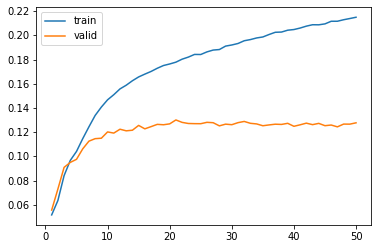

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

Se puede observar que los resultados son practicamente los mismos, no resultó suficiente el aumento de los datos. Tendría que tomar los discursos desde el 2019, preprocesar mejor la información y trabajar en la optimización de los parámetros de la red.